In [152]:
## Ethinicity Data by Borough 

In [153]:
import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from kneed import knee_locator

In [154]:
# read data from all sheets and store them in the same dataframe

def ethnicity_loop(file_name):
    
    # excel sheet 2020 to 2012
    result = pd.DataFrame(columns = ['Code','Borough', 'White', 'Asian', 'Black', 'Mixed/Other', 'Total'])
    for i in range(1, 10):
       
        X = pd.read_excel(file_name, sheet_name = i, usecols = 'A:G', skipfooter = 17, skiprows = 4,
                          header = None, names = ['Code', 'Borough', 'White', 'Asian', 'Black', 'Mixed/Other', 'Total'])
        X['Year'] = 2021 - int(f'{i}')
        
        result = pd.concat([result, X], ignore_index = True)
    return result

In [155]:
file_name = 'ethnic-groups-by-borough.xls'
ethnicity = ethnicity_loop(file_name)
ethnicity.tail(n=10)

,Code,Borough,White,Asian,Black,Mixed/Other,Total,Year
260,E09000022,Lambeth,201000,15000,71000,20000,306000,2012.0
261,E09000023,Lewisham,160000,34000,60000,24000,278000,2012.0
262,E09000024,Merton,129000,40000,18000,12000,200000,2012.0
263,E09000025,Newham,83000,144000,52000,35000,315000,2012.0
264,E09000026,Redbridge,128000,116000,19000,20000,282000,2012.0
265,E09000027,Richmond upon Thames,164000,11000,-,10000,186000,2012.0
266,E09000028,Southwark,171000,30000,60000,28000,290000,2012.0
267,E09000029,Sutton,147000,23000,9000,13000,192000,2012.0
268,E09000030,Tower Hamlets,100000,128000,18000,16000,261000,2012.0
269,E09000031,Waltham Forest,141000,56000,38000,25000,260000,2012.0


In [156]:
ethnicity.head(n=10)

,Code,Borough,White,Asian,Black,Mixed/Other,Total,Year
0,E09000002,Barking and Dagenham,99000,55000,51000,16000,222000,2020.0
1,E09000003,Barnet,255000,79000,28000,35000,398000,2020.0
2,E09000004,Bexley,188000,20000,28000,18000,254000,2020.0
3,E09000005,Brent,117000,138000,40000,37000,332000,2020.0
4,E09000006,Bromley,264000,25000,23000,25000,338000,2020.0
5,E09000007,Camden,155000,34000,29000,45000,263000,2020.0
6,E09000008,Croydon,224000,78000,61000,30000,392000,2020.0
7,E09000009,Ealing,163000,91000,29000,61000,344000,2020.0
8,E09000010,Enfield,218000,44000,58000,24000,343000,2020.0
9,E09000011,Greenwich,158000,61000,55000,19000,292000,2020.0


In [157]:
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.cluster import KMeans, DBSCAN, OPTICS

In [158]:
from umap import UMAP

keep_dims=2
rs=42

u = UMAP(
    n_neighbors=25,
    min_dist=0.01,
    n_components=keep_dims,
    random_state=rs)

<AxesSubplot:xlabel='White', ylabel='Year'>

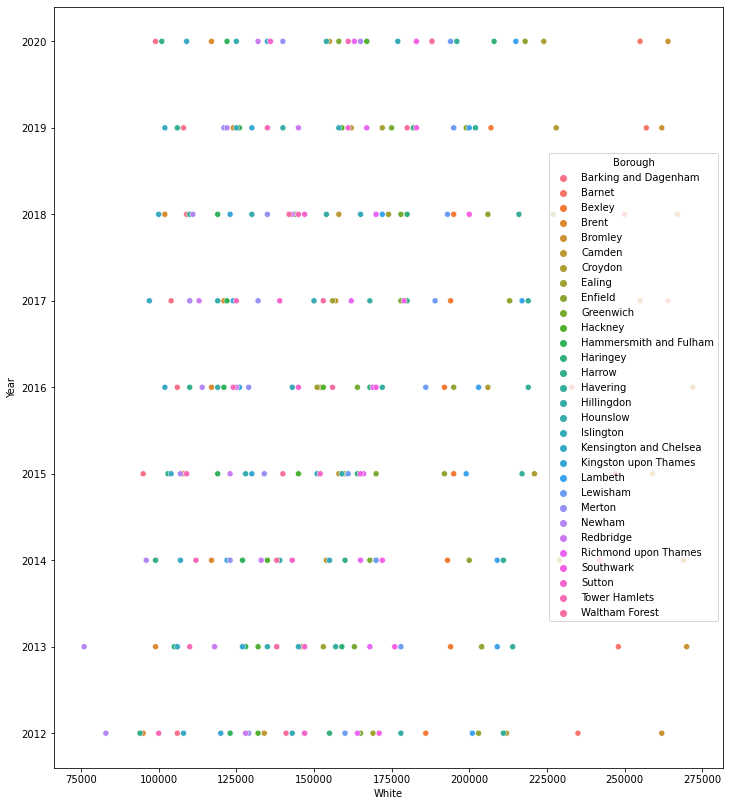

In [159]:
f,ax = plt.subplots(1,1,figsize=(12,14))
sns.scatterplot(x=ethnicity['White'], y=ethnicity['Year'], hue=ethnicity['Borough'], legend=True, ax=ax)

In [160]:
mapping = {}
for b in ['Barnet', 'Enfield', 'Haringey']:
    mapping[b]='North'
for b in ['Brent', 'Ealing', 'Hammersmith and Fulham',
          'Harrow', 'Hillingdon', 'Hounslow', 'Richmond upon Thames']:
    mapping[b]='West'
for b in ['Camden', 'Islington','Kensington and Chelsea', 'Lambeth', 'Southwark', 'Westminster']:
    mapping[b]='Central'
for b in ['Bromley','Croydon','Kingston upon Thames', 'Merton', 'Sutton', 'Wandsworth']:
    mapping[b]='South'
for b in ['Barking and Dagenham', 'Bexley', 'Greenwich', 'Hackney', 'Havering', 'Lewisham', 'Newham', 
          'Redbridge', 'Tower Hamlets', 'Waltham Forest']:
    mapping[b]='East'

ethnicity['Subregion'] = ethnicity.Borough.apply(lambda x: mapping[x])

ethnicity['White'] = pd.to_numeric(ethnicity['White'])
ethnicity['White'] = ethnicity['White'].astype(int)

In [161]:
# Keywords
kwds = dict(s=7,alpha=0.95,edgecolor="none")
#Subregion hues
sr_hue = ['North', 'West', 'Central', 'South', 'East']

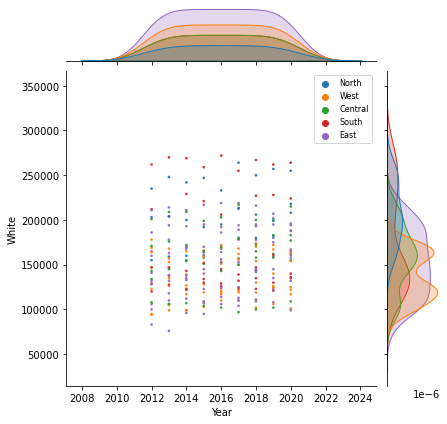

In [162]:
g = sns.jointplot(data=ethnicity, x='Year', y='White', height=6, 
                  hue='Subregion', hue_order=sr_hue, joint_kws=kwds)
g.ax_joint.legend(loc='upper right', prop={'size': 8});

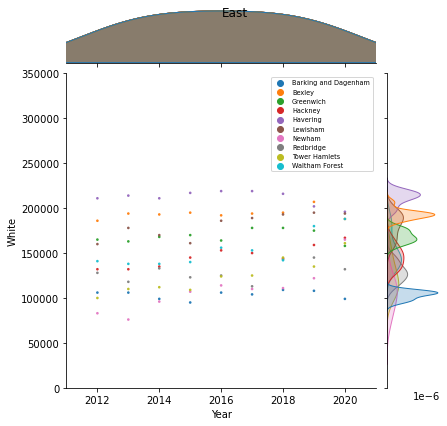

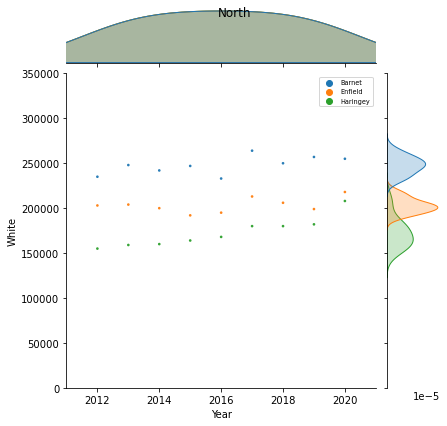

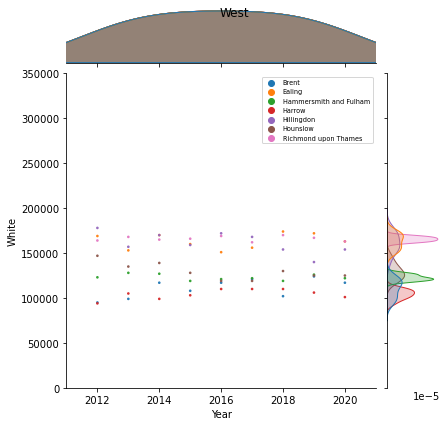

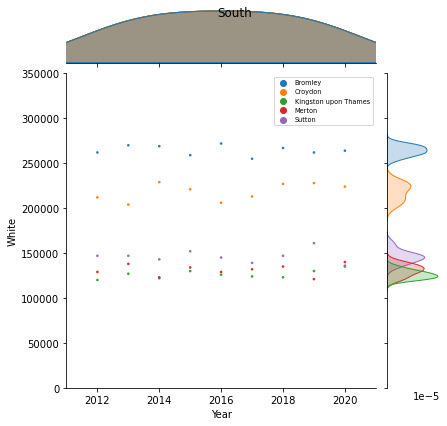

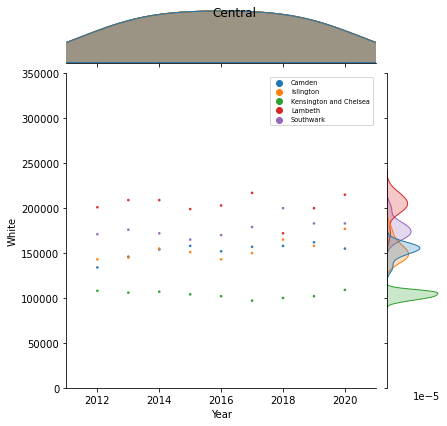

In [163]:
for e in ethnicity.Subregion.unique():
    g = sns.jointplot(data=ethnicity[ethnicity.Subregion==e], x='Year', y='White', 
                  hue='Borough', joint_kws=kwds)
    g.ax_joint.legend(loc='upper right', prop={'size': 6.5});
    g.ax_joint.set_ylim(0,350000)
    g.ax_joint.set_xlim(2011,2021)
    plt.suptitle(e)

In [164]:
from scipy import stats
df_types = ethnicity.dtypes
print(df_types)

ethnicity['Asian'] = pd.to_numeric(ethnicity['Asian'])
ethnicity['Asian'] = ethnicity['Asian'].astype(int)
ethnicity['Black'] = pd.to_numeric(ethnicity['Black'])
ethinicity['Black'] = ethnicity['Black'].astype(int)
ethnicity['Mixed/Other'] = pd.to_numeric(ethnicity['Mixed/Other'])
ethinicity['Mixed/Other'] = ethnicity['Mixed/Other'].astype(int)
    
ethnicity[['Asian', 'Black', 'Mixed/Other']] = ethnicity[['Asian', 'Black', 'Mixed/Other']].astype(str).astype(int)

ethnicity['All Other Races and Ethnic Groups'] = ethnicity['Black'] + ethnicity['Asian'] + ethnicity['Mixed/Other']

Code            object
Borough         object
White            int64
Asian           object
Black           object
Mixed/Other     object
Total           object
Year           float64
Subregion       object
dtype: object


ValueError: Unable to parse string "-" at position 25

In [165]:
print(ethnicity.iloc[25])

Code                      E09000027
Borough        Richmond upon Thames
White                        163000
Asian                         14000
Black                             -
Mixed/Other                   18000
Total                        200000
Year                         2020.0
Subregion                      West
Name: 25, dtype: object


In [166]:
ethnicity.loc[25, 'Black']
ethnicity.loc[ethnicity.Black == '-', 'Black'] = 0

ethnicity['Asian'] = pd.to_numeric(ethnicity['Asian'])
ethnicity['Asian'] = ethnicity['Asian'].astype(int)
ethnicity['Black'] = pd.to_numeric(ethnicity['Black'])
ethnicity['Black'] = ethnicity['Black'].astype(int)
ethnicity['Mixed/Other'] = pd.to_numeric(ethnicity['Mixed/Other'])
ethnicity['Mixed/Other'] = ethnicity['Mixed/Other'].astype(int)
    
ethnicity[['Asian', 'Black', 'Mixed/Other']] = ethnicity[['Asian', 'Black', 'Mixed/Other']].astype(str).astype(int)

ethnicity['All Other Races and Ethnic Groups'] = ethnicity['Black'] + ethnicity['Asian'] + ethnicity['Mixed/Other']

In [167]:
print(ethnicity['All Other Races and Ethnic Groups'])

0      122000
1      142000
2       66000
3      215000
4       73000
        ...  
265     21000
266    118000
267     45000
268    162000
269    119000
Name: All Other Races and Ethnic Groups, Length: 270, dtype: int64


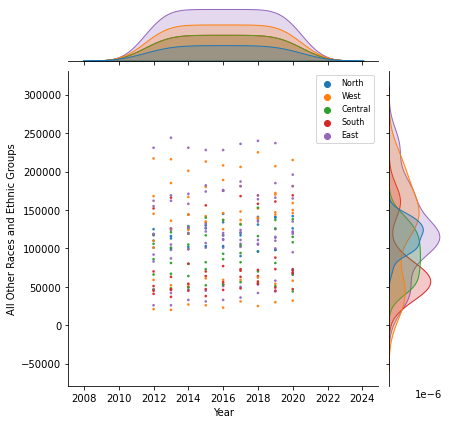

In [168]:
g = sns.jointplot(data=ethnicity, x='Year', y='All Other Races and Ethnic Groups', height=6, 
                  hue='Subregion', hue_order=sr_hue, joint_kws=kwds)
g.ax_joint.legend(loc='upper right', prop={'size': 8});

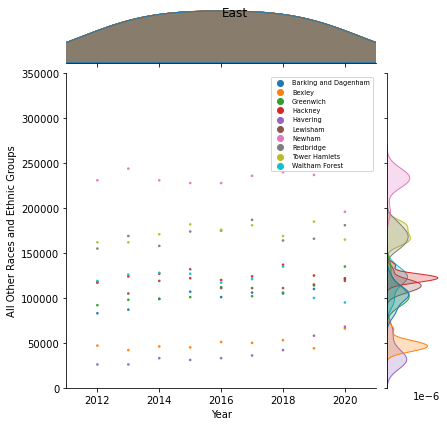

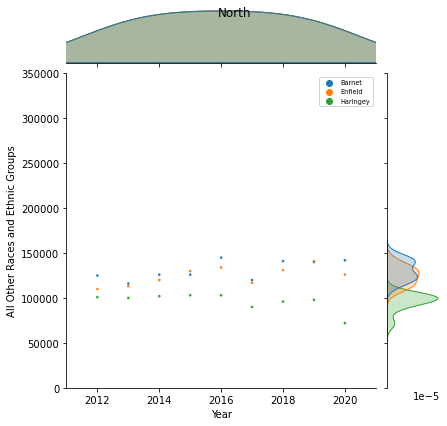

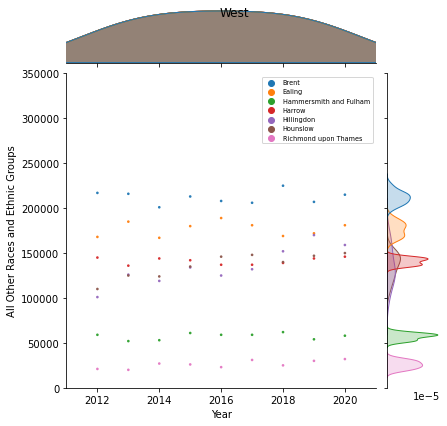

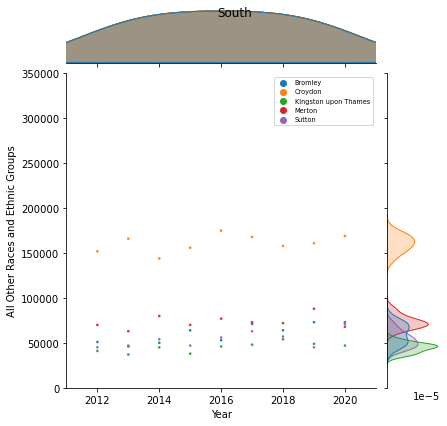

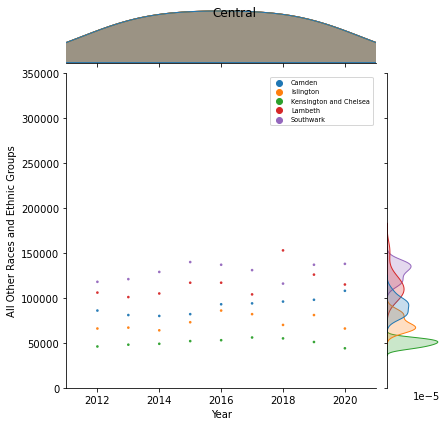

In [169]:
for e in ethnicity.Subregion.unique():
    g = sns.jointplot(data=ethnicity[ethnicity.Subregion==e], x='Year', y='All Other Races and Ethnic Groups', 
                  hue='Borough', joint_kws=kwds)
    g.ax_joint.legend(loc='upper right', prop={'size': 6.5});
    g.ax_joint.set_ylim(0,350000)
    g.ax_joint.set_xlim(2011,2021)
    plt.suptitle(e)